### Import libraries

In [14]:
import sys
sys.path.append("../")

In [15]:
import preprocess.view_utils as view_utils

In [16]:
import os
from os import environ
import numpy as np
from random import choices
import pandas as pd
from tqdm.notebook import tqdm

In [17]:
import skimage.io as io
import openslide

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
from utils.patches import *

In [20]:
import warnings
warnings.filterwarnings('ignore')

#### Get Dataframe with all data info

In [10]:
if environ.get('LVSC_DATA_PATH') is not None:
    PAIP2020_DATA_PATH = environ.get('PAIP2020_DATA_PATH')
else:
    print("Please set the environment variable PAIP2020_DATA_PATH. Read the README!")

In [11]:
train_patch_df = pd.read_csv("../utils/data/patches_level2_len256_stride64.csv")
train_patch_df.head()

,case,patch,mask,type,ph,pw,MSI-H,is_validation
0,training_data_11,Train/patches_level2_len256_stride64/training_...,Train/patches_level2_len256_stride64/training_...,background,4558,5695,0,0
1,training_data_11,Train/patches_level2_len256_stride64/training_...,Train/patches_level2_len256_stride64/training_...,border,2912,2687,0,0
2,training_data_11,Train/patches_level2_len256_stride64/training_...,Train/patches_level2_len256_stride64/training_...,background,1645,4159,0,0
3,training_data_11,Train/patches_level2_len256_stride64/training_...,Train/patches_level2_len256_stride64/training_...,background,1329,2367,0,0
4,training_data_11,Train/patches_level2_len256_stride64/training_...,Train/patches_level2_len256_stride64/training_...,background,3102,1279,0,0


In [12]:
print("Total patches: {}".format(len(train_patch_df)))

Total patches: 436720


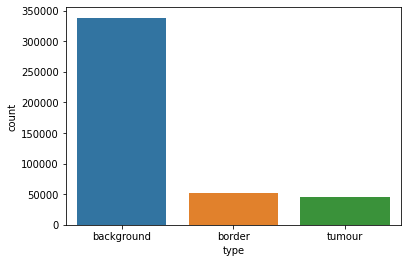

In [13]:
sns.countplot(train_patch_df["type"])

### Image & Mask range

In [14]:
first_patch_path = os.path.join(PAIP2020_DATA_PATH, train_patch_df.loc[0]["patch"])
first_mask_path = os.path.join(PAIP2020_DATA_PATH, train_patch_df.loc[0]["mask"])

In [15]:
image = (io.imread(first_patch_path) / 255.0).astype(np.float32)
mask = io.imread(first_mask_path).astype(np.float32)

In [16]:
print("Image {} -> Max {} Min {}".format(image.shape, image.max(), image.min()))
print("Mask {} -> Max {} Min {} / Values {}".format(mask.shape, mask.max(), mask.min(), np.unique(mask)))

Image (256, 256, 3) -> Max 1.0 Min 0.30588236451148987
Mask (256, 256) -> Max 0.0 Min 0.0 / Values [0.]


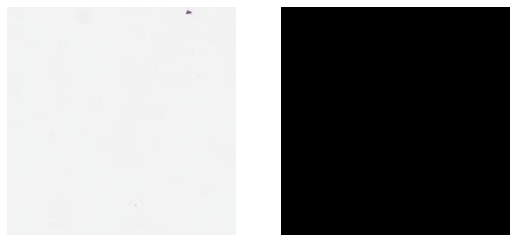

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 9))
ax1.axis('off'); ax2.axis('off')
ax1.imshow(image)
ax2.imshow(mask, cmap="gray")

### Get slide filenames

In [18]:
train_patch_df.head()

,case,patch,mask,type,ph,pw,MSI-H,is_validation
0,training_data_11,Train/patches_level2_len256_stride64/training_...,Train/patches_level2_len256_stride64/training_...,background,4558,5695,0,0
1,training_data_11,Train/patches_level2_len256_stride64/training_...,Train/patches_level2_len256_stride64/training_...,border,2912,2687,0,0
2,training_data_11,Train/patches_level2_len256_stride64/training_...,Train/patches_level2_len256_stride64/training_...,background,1645,4159,0,0
3,training_data_11,Train/patches_level2_len256_stride64/training_...,Train/patches_level2_len256_stride64/training_...,background,1329,2367,0,0
4,training_data_11,Train/patches_level2_len256_stride64/training_...,Train/patches_level2_len256_stride64/training_...,background,3102,1279,0,0


In [19]:
train_csv = pd.read_csv("../utils/data/train.csv")
train_csv.head()

,case,wsi,annotation,annotation_tif,MSI-H,is_validation
0,training_data_41,Train/WSI/training_data_41.svs,Train/annotation/training_data_41.xml,Train/mask_img_l2/training_data_41_l2_annotati...,0,0
1,training_data_38,Train/WSI/training_data_38.svs,Train/annotation/training_data_38.xml,Train/mask_img_l2/training_data_38_l2_annotati...,0,0
2,training_data_36,Train/WSI/training_data_36.svs,Train/annotation/training_data_36.xml,Train/mask_img_l2/training_data_36_l2_annotati...,0,0
3,training_data_10,Train/WSI/training_data_10.svs,Train/annotation/training_data_10.xml,Train/mask_img_l2/training_data_10_l2_annotati...,0,0
4,training_data_08,Train/WSI/training_data_08.svs,Train/annotation/training_data_08.xml,Train/mask_img_l2/training_data_08_l2_annotati...,0,0


In [20]:
selected_cases = train_csv.loc[train_csv["case"].isin(train_patch_df["case"].unique())]

In [21]:
res = list(zip(PAIP2020_DATA_PATH + selected_cases.wsi, PAIP2020_DATA_PATH + selected_cases.annotation_tif))
print(res[0:5])

[('/home/maparla/DeepLearning/Datasets/PAIP2020/Train/WSI/training_data_41.svs', '/home/maparla/DeepLearning/Datasets/PAIP2020/Train/mask_img_l2/training_data_41_l2_annotation_tumor.tif'), ('/home/maparla/DeepLearning/Datasets/PAIP2020/Train/WSI/training_data_38.svs', '/home/maparla/DeepLearning/Datasets/PAIP2020/Train/mask_img_l2/training_data_38_l2_annotation_tumor.tif'), ('/home/maparla/DeepLearning/Datasets/PAIP2020/Train/WSI/training_data_36.svs', '/home/maparla/DeepLearning/Datasets/PAIP2020/Train/mask_img_l2/training_data_36_l2_annotation_tumor.tif'), ('/home/maparla/DeepLearning/Datasets/PAIP2020/Train/WSI/training_data_10.svs', '/home/maparla/DeepLearning/Datasets/PAIP2020/Train/mask_img_l2/training_data_10_l2_annotation_tumor.tif'), ('/home/maparla/DeepLearning/Datasets/PAIP2020/Train/WSI/training_data_08.svs', '/home/maparla/DeepLearning/Datasets/PAIP2020/Train/mask_img_l2/training_data_08_l2_annotation_tumor.tif')]


### Metrics on whole mask

In [22]:
from utils.metrics import *

In [23]:
big_mask_path = res[0][1]
big_mask = io.imread(big_mask_path).astype(np.float32)
print("Mask shape: {} / Values: {}".format(big_mask.shape, np.unique(big_mask)))

Mask shape: (5816, 7594) / Values: [0. 1.]


In [24]:
random_mask = np.random.randint(2, size=big_mask.shape).astype(np.uint8)

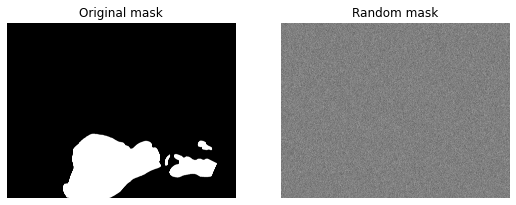

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 9))
ax1.axis('off'); ax2.axis('off')
ax1.title.set_text("Original mask")
ax1.imshow(big_mask, cmap="gray")
ax2.title.set_text("Random mask")
ax2.imshow(random_mask, cmap="gray")

In [26]:
print("IOU {}".format(jaccard_coef(big_mask, random_mask)))
print("DICE {}".format(dice_coef(big_mask, random_mask)))

IOU 0.11273225684206872
DICE 0.20262242987725113


### Dataloader

In [1]:
import sys
sys.path.append("../")

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from torch.utils.data import DataLoader
from utils.dataload import *
from utils.data_augmentation import data_augmentation_selector

In [4]:
slide_level, patch_len, stride_len = 2, 256, 64
batch_size = 32

In [5]:
train_aug, train_aug_img, val_aug = data_augmentation_selector("none", 256, 256)

Using None Data Augmentation


In [6]:
train_aug, train_aug_img, val_aug = data_augmentation_selector("none", 256, 256)

Using None Data Augmentation


In [7]:
val_dataset = PatchDataset(
    "validation", 2, 256, 64, val_aug, [],
    normalize=False, patch_type="all", seed=2
)



-- Dataloader statistics: validation --
'background' -> 48684
'border' -> 8511
'tumour' -> 7152


In [8]:
slide_names = val_dataset.get_slide_filenames()

In [12]:
import openslide

In [14]:
from utils.patches import *

In [15]:
for num, (cur_slide_path, cur_mask_path) in enumerate(slide_names):
    # Load WSI
    mask = mask_loader(cur_mask_path)

    wsi_head = openslide.OpenSlide(cur_slide_path)
    slide_img = wsi_head.read_region(
        (0, 0), val_dataset.slide_level, wsi_head.level_dimensions[val_dataset.slide_level]
    )
    pred_h = wsi_head.level_dimensions[val_dataset.slide_level][1]
    pred_w = wsi_head.level_dimensions[val_dataset.slide_level][0]
    slide_img = np.asarray(slide_img)[:, :, :3]  # Quitamos el canal alpha ya que no tiene información relevante

    coors_arr = wsi_stride_splitting(pred_h, pred_w, val_dataset.patch_len, val_dataset.stride_len)
    patch_arr, wmap = gen_patch_wmap(slide_img, coors_arr, val_dataset.patch_len)
    break
    patch_dset = PatchArrayDataset(patch_arr, val_dataset.transform, val_dataset.img_transform)
    patch_loader = DataLoader(patch_dset, batch_size=batch_size, shuffle=False, num_workers=4, drop_last=False)
    pred_map = np.zeros_like(wmap).astype(np.float32)
    
    break

In [16]:
patch_arr.shape

(10208, 256, 256, 3)

In [17]:
patch_dset = PatchArrayDataset(patch_arr, val_dataset.transform, val_dataset.img_transform)

In [18]:
patch_loader = DataLoader(patch_dset, batch_size=batch_size, shuffle=False, num_workers=4, drop_last=False)

In [19]:
next(iter(patch_loader))

TypeError: Caught TypeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/maparla/venv/lib/python3.7/site-packages/torch/utils/data/_utils/worker.py", line 178, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/maparla/venv/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 47, in fetch
    return self.collate_fn(data)
  File "/home/maparla/venv/lib/python3.7/site-packages/torch/utils/data/_utils/collate.py", line 79, in default_collate
    return [default_collate(samples) for samples in transposed]
  File "/home/maparla/venv/lib/python3.7/site-packages/torch/utils/data/_utils/collate.py", line 79, in <listcomp>
    return [default_collate(samples) for samples in transposed]
  File "/home/maparla/venv/lib/python3.7/site-packages/torch/utils/data/_utils/collate.py", line 81, in default_collate
    raise TypeError(default_collate_err_msg_format.format(elem_type))
TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'NoneType'>


In [28]:
patch_dset = PatchDataset(
    "train", slide_level, patch_len, stride_len, train_aug, train_aug_img, 
    normalize=False, patch_type="all", samples_per_type=20000, seed=2
)

                case  patch   mask   type     ph     pw  MSI-H  is_validation  \
<class 'int'>  60000  60000  60000  60000  60000  60000  60000          60000   

               frequency  
<class 'int'>      60000  


In [29]:
for indx, row in patch_dset.df_patches.groupby(["type"]).count().iterrows():
    print("'{}' -> {}".format(indx, row["case"]))

'background' -> 30478
'border' -> 15495
'tumour' -> 14027


In [7]:
patch_loader = DataLoader(patch_dset, batch_size=batch_size, shuffle=False, num_workers=4, drop_last=False)

In [8]:
for image, mask in patch_loader:
    break

In [9]:
image.shape

torch.Size([32, 3, 256, 256])

In [10]:
mask.shape

torch.Size([32, 1, 256, 256])

In [11]:
image.mean()

tensor(0.7717)

In [12]:
image[0].std()

tensor(0.1089)

In [15]:
image.max()

tensor(1.)

In [21]:
sample = image.data.cpu().numpy()[1].transpose(1,2,0)
sample_mask = mask.data.cpu().numpy()[1].transpose(1,2,0)

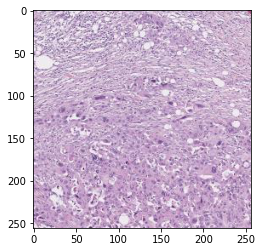

In [22]:
plt.imshow(sample)

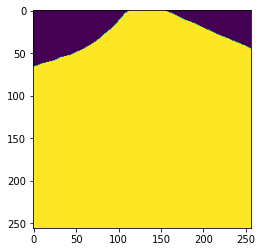

In [23]:
plt.imshow(sample_mask.squeeze(2))

In [25]:
patch_dset.df_patches.loc[patch_dset.df_patches["type"]=="border"]

,case,patch,mask,type,ph,pw,MSI-H,is_validation
82705,training_data_28,Train/patches_level2_len256_stride64/training_...,Train/patches_level2_len256_stride64/training_...,tumour,4784,2233,0,1
82706,training_data_28,Train/patches_level2_len256_stride64/training_...,Train/patches_level2_len256_stride64/training_...,background,2232,3126,0,1
82707,training_data_28,Train/patches_level2_len256_stride64/training_...,Train/patches_level2_len256_stride64/training_...,background,446,7274,0,1
82708,training_data_28,Train/patches_level2_len256_stride64/training_...,Train/patches_level2_len256_stride64/training_...,background,1467,6380,0,1
82709,training_data_28,Train/patches_level2_len256_stride64/training_...,Train/patches_level2_len256_stride64/training_...,background,2806,6125,0,1
...,...,...,...,...,...,...,...,...
436715,training_data_32,Train/patches_level2_len256_stride64/training_...,Train/patches_level2_len256_stride64/training_...,background,958,446,1,1
436716,training_data_32,Train/patches_level2_len256_stride64/training_...,Train/patches_level2_len256_stride64/training_...,background,1342,6253,1,1
436717,training_data_32,Train/patches_level2_len256_stride64/training_...,Train/patches_level2_len256_stride64/training_...,background,5304,957,1,1
436718,training_data_32,Train/patches_level2_len256_stride64/training_...,Train/patches_level2_len256_stride64/training_...,background,2364,7146,1,1


In [27]:
df = patch_dset.df_patches 

In [126]:
df['frequency'] = df['type'].map((1- (df['type'].value_counts()+len(df)*0.3) / len(df)))

In [127]:
df.head()

,case,patch,mask,type,ph,pw,MSI-H,is_validation,frequency
0,training_data_11,Train/patches_level2_len256_stride64/training_...,Train/patches_level2_len256_stride64/training_...,background,4558,5695,0,0,-0.077803
1,training_data_11,Train/patches_level2_len256_stride64/training_...,Train/patches_level2_len256_stride64/training_...,border,2912,2687,0,0,0.581871
2,training_data_11,Train/patches_level2_len256_stride64/training_...,Train/patches_level2_len256_stride64/training_...,background,1645,4159,0,0,-0.077803
3,training_data_11,Train/patches_level2_len256_stride64/training_...,Train/patches_level2_len256_stride64/training_...,background,1329,2367,0,0,-0.077803
4,training_data_11,Train/patches_level2_len256_stride64/training_...,Train/patches_level2_len256_stride64/training_...,background,3102,1279,0,0,-0.077803


In [128]:
df.groupby("type").count()

,case,patch,mask,ph,pw,MSI-H,is_validation,frequency
type,,,,,,,,
background,289633,289633,289633,289633,289633,289633,289633,289633
border,43988,43988,43988,43988,43988,43988,43988,43988
tumour,38752,38752,38752,38752,38752,38752,38752,38752


In [129]:
testa = df.sample(10200, weights=df['frequency'])

ValueError: weight vector many not include negative values

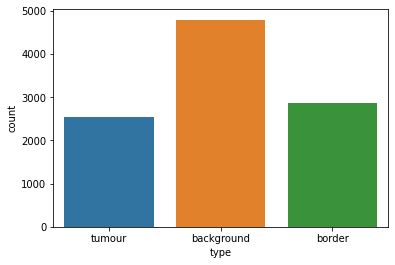

In [130]:
sns.countplot(testa["type"])